# Transformer #

In [1]:
#Import packages

import shutil
import pandas as pd
import tensorflow
import os
import random
import numpy as np
import tensorflow as tf

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
#Import dataset
df = pd.read_excel('DataAccess\datasets\dataset_tvi_final.xlsx', parse_dates=True)
df

,Data,Canal,Programa,Tipo1,Tipo2,Hora Início,Hora Fim,Duração,Dia Semana,Apresentador/Pivot,...,MARTA CARDOSO,NUNO EIRO,Ninguem,PEDRO BENEVIDES,PEDRO BENEVIDES/SARA PINTO,PEDRO TEIXEIRA,RICARDO NUNES,SANDRA FELGUEIRAS,SOUSA MARTINS,VARIOS
0,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
1,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
3,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
4,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,2024-12-31,TVI,SECRET STORY - O VENCEDOR,DIVERTIMENTO,REALITY-SHOW,00:06:31,00:50:59,2668,Terça,CRISTINA FERREIRA,...,0,0,0,0,0,0,0,0,0,0
11541,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0
11542,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0
11543,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0


In [3]:
# Convert the date column into datetime format
df['Data'] = df['Data'].astype(str)  # Convert in string
df['Data'] = pd.to_datetime(df['Data'], format= f'%Y-%m-%d')

# Concatenate 'Data' with 'Hora início'
df['timestamp'] = pd.to_datetime(df['Data'].astype(str) + ' ' + df['Hora Início'])

# Set timestamp as index
df = df.set_index(['timestamp'])
df

,Data,Canal,Programa,Tipo1,Tipo2,Hora Início,Hora Fim,Duração,Dia Semana,Apresentador/Pivot,...,MARTA CARDOSO,NUNO EIRO,Ninguem,PEDRO BENEVIDES,PEDRO BENEVIDES/SARA PINTO,PEDRO TEIXEIRA,RICARDO NUNES,SANDRA FELGUEIRAS,SOUSA MARTINS,VARIOS
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 00:06:31,2024-12-31,TVI,SECRET STORY - O VENCEDOR,DIVERTIMENTO,REALITY-SHOW,00:06:31,00:50:59,2668,Terça,CRISTINA FERREIRA,...,0,0,0,0,0,0,0,0,0,0
2024-12-31 00:58:05,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0
2024-12-31 00:58:05,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df.columns

Index(['Data', 'Canal', 'Programa', 'Tipo1', 'Tipo2', 'Hora Início',
       'Hora Fim', 'Duração', 'Dia Semana', 'Apresentador/Pivot',
       'Universo rat%', 'Universo shr%', 'Clusters rat', 'Hora Fim_sin',
       'Hora Fim_cos', 'Hora Início_sin', 'Hora Início_cos',
       'tipo1_CULT.GERAL/CONHECIME', 'tipo1_DESPORTO', 'tipo1_DIVERTIMENTO',
       'tipo1_FICÇÃO', 'tipo1_INFORMAÇÃO', 'tipo1_PUBLICIDADE', 'tipo2_BLOCO',
       'tipo2_CONCURSOS', 'tipo2_FILME', 'tipo2_GALAS', 'tipo2_HUMOR',
       'tipo2_INF.DESPORTIVA', 'tipo2_MAGAZINES', 'tipo2_MINI-SÉRIE',
       'tipo2_MUSICAIS', 'tipo2_NOTICIÁRIO', 'tipo2_PROGRAMAS POLÍTICOS',
       'tipo2_REALITY-SHOW', 'tipo2_SÉRIE', 'tipo2_TALK-SHOWS',
       'tipo2_TELENOVELA', 'tipo2_TRANSMISSÃO DESPORTO', 'tipo2_VARIEDADES',
       'Domingo', 'Quarta', 'Quinta', 'Segunda', 'Sexta', 'Sábado', 'Terça',
       'ALICE ALVES', 'ANA BARBOSA/BERNARDINA BRITO', 'ANDREIA VALE',
       'ANDREIA VALE/PEDRO BENEVIDES',
       'ANDREIA VALE/PEDRO BENEVI

In [5]:
# Remove index duplicates before resampling
df = df[~df.index.duplicated(keep='first')]

# Resampling the time series in 15 min periods
df_resampled = df.groupby('Canal').apply(lambda x: x.resample("15min").ffill())

# Removing the extra index created by groupby
df_resampled.index = df_resampled.index.droplevel(0)

# Interpolate the values to avoid repeated values
df_resampled = df_resampled.interpolate(method="ffill")

# Drop NAN rows
df_resampled = df_resampled.dropna()

df_resampled

C:\Users\mapim\AppData\Local\Temp\ipykernel_100236\1181237943.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_resampled = df.groupby('Canal').apply(lambda x: x.resample("15min").ffill())
C:\Users\mapim\AppData\Local\Temp\ipykernel_100236\1181237943.py:11: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled = df_resampled.interpolate(method="ffill")


,Data,Canal,Programa,Tipo1,Tipo2,Hora Início,Hora Fim,Duração,Dia Semana,Apresentador/Pivot,...,MARTA CARDOSO,NUNO EIRO,Ninguem,PEDRO BENEVIDES,PEDRO BENEVIDES/SARA PINTO,PEDRO TEIXEIRA,RICARDO NUNES,SANDRA FELGUEIRAS,SOUSA MARTINS,VARIOS
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:15:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-01 00:30:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-01 00:45:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-01 01:00:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-01 01:15:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 23:45:00,2024-12-30,TVI,MORANGOS COM AÇUCAR,FICÇÃO,SÉRIE,23:28:00,00:24:26,3386.0,Segunda,Ninguem,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-31 00:00:00,2024-12-30,TVI,MORANGOS COM AÇUCAR,FICÇÃO,SÉRIE,23:28:00,00:24:26,3386.0,Segunda,Ninguem,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-31 00:15:00,2024-12-31,TVI,SECRET STORY - O VENCEDOR,DIVERTIMENTO,REALITY-SHOW,00:06:31,00:50:59,2668.0,Terça,CRISTINA FERREIRA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Create a df with one-hot encoded "Programa" unique values
one_hot_prog = pd.get_dummies(df_resampled['Programa'], dtype = int)

# Concatenate the dataframe with the program embeddings
df = pd.concat([
    df_resampled,
    #new_df, # When taking the hosts from the dataset
    one_hot_prog
], axis=1)

df

,Data,Canal,Programa,Tipo1,Tipo2,Hora Início,Hora Fim,Duração,Dia Semana,Apresentador/Pivot,...,SECRET STORY - ULTIMA HORA FIM DE SEMANA,SECRET STORY - VERDADE OU MENTIRA,SEDUÇAO (R),SOMOS PORTUGAL,SR. RUI,THE ART OF TASTING PORTUGAL,TODA A GENTE ME DIZ ISSO,TONY - SONHOS DE MENINO,TVI EXTRA,VAI OU RACHA
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:15:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0,0,0,0,0,0,0,0,0,0
2024-01-01 00:30:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0,0,0,0,0,0,0,0,0,0
2024-01-01 00:45:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0,0,0,0,0,0,0,0,0,0
2024-01-01 01:00:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0,0,0,0,0,0,0,0,0,0
2024-01-01 01:15:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 23:45:00,2024-12-30,TVI,MORANGOS COM AÇUCAR,FICÇÃO,SÉRIE,23:28:00,00:24:26,3386.0,Segunda,Ninguem,...,0,0,0,0,0,0,0,0,0,0
2024-12-31 00:00:00,2024-12-30,TVI,MORANGOS COM AÇUCAR,FICÇÃO,SÉRIE,23:28:00,00:24:26,3386.0,Segunda,Ninguem,...,0,0,0,0,0,0,0,0,0,0
2024-12-31 00:15:00,2024-12-31,TVI,SECRET STORY - O VENCEDOR,DIVERTIMENTO,REALITY-SHOW,00:06:31,00:50:59,2668.0,Terça,CRISTINA FERREIRA,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.columns

Index(['Data', 'Canal', 'Programa', 'Tipo1', 'Tipo2', 'Hora Início',
       'Hora Fim', 'Duração', 'Dia Semana', 'Apresentador/Pivot',
       ...
       'SECRET STORY - ULTIMA HORA FIM DE SEMANA',
       'SECRET STORY - VERDADE OU MENTIRA', 'SEDUÇAO (R)', 'SOMOS PORTUGAL',
       'SR. RUI', 'THE ART OF TASTING PORTUGAL', 'TODA A GENTE ME DIZ ISSO',
       'TONY - SONHOS DE MENINO', 'TVI EXTRA', 'VAI OU RACHA'],
      dtype='object', length=265)

In [8]:
# Define the target
y = df['Universo rat%']

# Reference column
ref_col = 'Clusters rat'

# Reference column index
ref_idx = df.columns.get_loc(ref_col)

# Selected columns (Features) after the reference column
features = df.columns[ref_idx + 1:]

# Create the whole feature space
X = pd.concat([df[features], df['Duração']], axis=1)

X

,Hora Fim_sin,Hora Fim_cos,Hora Início_sin,Hora Início_cos,tipo1_CULT.GERAL/CONHECIME,tipo1_DESPORTO,tipo1_DIVERTIMENTO,tipo1_FICÇÃO,tipo1_INFORMAÇÃO,tipo1_PUBLICIDADE,...,SECRET STORY - VERDADE OU MENTIRA,SEDUÇAO (R),SOMOS PORTUGAL,SR. RUI,THE ART OF TASTING PORTUGAL,TODA A GENTE ME DIZ ISSO,TONY - SONHOS DE MENINO,TVI EXTRA,VAI OU RACHA,Duração
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:15:00,0.555086,0.831793,0.061774,0.998090,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,7242.0
2024-01-01 00:30:00,0.555086,0.831793,0.061774,0.998090,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,7242.0
2024-01-01 00:45:00,0.555086,0.831793,0.061774,0.998090,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,7242.0
2024-01-01 01:00:00,0.555086,0.831793,0.061774,0.998090,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,7242.0
2024-01-01 01:15:00,0.555086,0.831793,0.061774,0.998090,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,7242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 23:45:00,0.106409,0.994322,-0.139173,0.990268,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,3386.0
2024-12-31 00:00:00,0.106409,0.994322,-0.139173,0.990268,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,3386.0
2024-12-31 00:15:00,0.220627,0.975358,0.028430,0.999596,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2668.0


In [9]:
len(X.columns)

253

## Data Preprocessing and preparation for the Training ##

In [ ]:
### ----------------------- Define a pre-processing function for cross-validation --------------------

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.utils import timeseries_dataset_from_array
from numpy import array

# Indexes of numerical features and high cardinality categorical variables
prog_idx_st = X.columns.get_loc('VARIOS') #The program starts after the "VARIOS" when pivot is there. Otherwise, it's 'Terça'
prog_idx_end = X.columns.get_loc('VAI OU RACHA')
prog_idx_pca = list(range(prog_idx_st + 1, prog_idx_end+1))

# Create a function that runs all the preprocessing and prepares the datasets for the model
def prep_ds_rnns (X, y, seq_len, n_splits, batch_size):
    # The function returns the respective datasets

    # 80% cross-validation training + 20% test (holdout)
    X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    y_test_index = y_test.index

    tscv = TimeSeriesSplit(n_splits=n_splits)
    #seq_len = 20
    #batch_size = 32

    # Create an empty list to store the datasets
    datasets = []

    for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_cv)):
        X_tr, X_val = X_train_cv.iloc[train_idx], X_train_cv.iloc[val_idx]
        y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]

        # Preprocessing -> Data normalization and Dimensionality reduction
        scaler_dur = MinMaxScaler(feature_range=(-1, 1))
        X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
        X_val['Duração'] = scaler_dur.transform(X_val['Duração'].values.reshape(-1, 1))
        X_test['Duração'] = scaler_dur.transform(X_test['Duração'].values.reshape(-1, 1))

        scaler_rat = MinMaxScaler(feature_range=(-1, 1))
        y_tr_scaled = scaler_rat.fit_transform(array(y_tr).reshape(-1, 1))
        y_val_scaled = scaler_rat.transform(array(y_val).reshape(-1, 1))
        y_test_scaled = scaler_rat.transform(array(y_test).reshape(-1, 1))

        pca = PCA(n_components=28, random_state=42)
        X_tr_pca = pca.fit_transform(X_tr.iloc[:, prog_idx_st+1:prog_idx_end])
        X_val_pca = pca.transform(X_val.iloc[:, prog_idx_st+1:prog_idx_end])
        X_test_pca = pca.transform(X_test.iloc[:, prog_idx_st+1:prog_idx_end])

        # ------------------- Feature Selection ----------------------

        cols_before = X.columns[:prog_idx_st+1]
        cols_after = X.columns[prog_idx_end+1:]
        orig_cols = list(cols_before) + list(cols_after)
        pca_cols = [f"PCA_{i+1}" for i in range(X_tr_pca.shape[1])]
        all_cols = orig_cols + pca_cols

        X_tr_final = pd.DataFrame(
            np.hstack([X_tr[orig_cols].values, X_tr_pca]),
            index=X_tr.index,
            columns=all_cols
        )
        X_val_final = pd.DataFrame(
            np.hstack([X_val[orig_cols].values, X_val_pca]),
            index=X_val.index,
            columns=all_cols
        )
        X_test_final = pd.DataFrame(
            np.hstack([X_test[orig_cols].values, X_test_pca]),
            index=X_test.index,
            columns=all_cols
        )

        # Get the number of features
        n_features = X_tr_final.shape[1]

        # --- Create RNN datasets ---
        train_dataset = timeseries_dataset_from_array(
            data=X_tr_final, targets=y_tr_scaled,
            sequence_length=seq_len, batch_size=batch_size, shuffle=False
        )

        val_dataset = timeseries_dataset_from_array(
            data=X_val_final, targets=y_val_scaled,
            sequence_length=seq_len, batch_size=batch_size, shuffle=False
        )

        test_dataset = timeseries_dataset_from_array(
            data=X_test_final, targets=y_test_scaled,
            sequence_length=seq_len, batch_size=batch_size, shuffle=False
        )
        
        datasets.append((train_dataset, val_dataset, test_dataset, scaler_rat))

    return datasets, n_features, y_test_index

In [ ]:
### ------------------------ Define the models ------------------------------

## ------------------- Built-in Keras Layers transformer -----------------
import tensorflow as tf
from keras import layers, models, Input
from keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Dense, GlobalAveragePooling1D, Conv1D
from keras.losses import Huber
from keras.utils import plot_model

# Define function for the Encoder
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Multi-head attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

# Build the model for the transformer
def build_complex_transformer(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = Input(shape=input_shape)
    x = inputs
    
    for i in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    
    x = GlobalAveragePooling1D(data_format="channels_first")(x)
    
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    
    outputs = Dense(1)(x)
    
    return models.Model(inputs, outputs)

def complex_transformer(n_timesteps, n_features):
    model = build_complex_transformer(input_shape=(n_timesteps, n_features),
                                        head_size=32, # head_size = 32 initially
                                        num_heads=2, # 2 initially. Before was 4
                                        ff_dim=64, # Initially 64 - 256 before
                                        num_transformer_blocks=4, #3 before
                                        mlp_units=[64],
                                        dropout=0.1,
                                        mlp_dropout=0.1)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4, clipnorm=1.0), # 1e-4 - the best was with 2e-4
                loss=Huber, metrics=['mae', 'mse'])
    
    # Save the model architecture as an image
    plot_model(model, to_file='complex_transformer_architecture.png', show_shapes=True, show_layer_names=True)
    
    return model

## ------------------------ Simpler Transformer ------------------------------
import tensorflow as tf
from keras import layers, models, Input
from keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Dense, GlobalAveragePooling1D, Conv1D

def build_transformer(input_shape):
    inputs = Input(shape=input_shape)
    
    # 1. Initial feature extraction
    x = Conv1D(128, kernel_size=3, padding='same', activation='relu')(inputs)
    x = LayerNormalization()(x)
    
    # 2. Simplified attention
    x = MultiHeadAttention(num_heads=8, key_dim=32)(x, x) # num_heads=8 initially
    x = Dropout(0.2)(x) # dropout = 0.1 initially. Before was 0.2
    
    # 3. Temporal processing
    x = Conv1D(32, kernel_size=3, padding='same', activation='relu')(x) # Conv 1D estava a 64 mas estou a usar o original
    x = GlobalAveragePooling1D()(x)
    
    # 4. Final regression
    x = Dense(64, activation='relu')(x) # Initially at 32. Before was 64
    outputs = Dense(1, activation='linear')(x)
    
    return models.Model(inputs, outputs)

def simpler_transformer (n_timesteps, n_features):
    model = build_transformer(input_shape=(n_timesteps, n_features)) # It was 30 and top 10 feat
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4, clipnorm=1.0), # Before was 1e-4 (aqui meteu-se antes o 5e-5)
                loss=Huber, metrics=['mae', 'mse'])
    
    # Save the model architecture as an image
    plot_model(model, to_file='simpler_transformer_architecture.png', show_shapes=True, show_layer_names=True)
    
    return model

In [11]:
### ------------------------ Define the models ------------------------------

## ------------------- Built-in Keras Layers transformer -----------------
import tensorflow as tf
from keras import layers, models, Input
from keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Dense, GlobalAveragePooling1D, Conv1D
from keras.losses import Huber
from keras.utils import plot_model

# Define function for the Encoder
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Multi-head attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

# Build the model for the transformer
def build_complex_transformer(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = Input(shape=input_shape)
    x = inputs
    
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    
    x = GlobalAveragePooling1D(data_format="channels_first")(x)
    
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    
    outputs = Dense(1)(x)
    
    return models.Model(inputs, outputs)

def complex_transformer(n_timesteps, n_features):
    model = build_complex_transformer(input_shape=(n_timesteps, n_features),
                                        head_size=64,
                                        num_heads=2,
                                        ff_dim=256,
                                        num_transformer_blocks=6,
                                        mlp_units=[128],
                                        dropout=0.2,
                                        mlp_dropout=0.2)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, clipnorm=1.0),
                loss=Huber, metrics=['mae', 'mse'])
    
    # Save the model architecture as an image
    plot_model(model, to_file='complex_transformer_architecture.png', show_shapes=True, show_layer_names=True)

    return model

## ------------------------ Simpler Transformer ------------------------------
import tensorflow as tf
from keras import layers, models, Input
from keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Dense, GlobalAveragePooling1D, Conv1D

def build_transformer(input_shape):
    inputs = Input(shape=input_shape)
    
    # 1. Initial feature extraction
    x = Conv1D(96, kernel_size=3, padding='same', activation='relu')(inputs)
    x = LayerNormalization()(x)
    
    # 2. Simplified attention
    x = MultiHeadAttention(num_heads=8, key_dim=32)(x, x)
    x = Dropout(0.15)(x)
    
    # 3. Temporal processing
    x = Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = GlobalAveragePooling1D()(x)
    
    # 4. Final regression
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1, activation='linear')(x)
    
    return models.Model(inputs, outputs)

def simpler_transformer (n_timesteps, n_features):
    model = build_transformer(input_shape=(n_timesteps, n_features))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, clipnorm=1.0),
                loss=Huber, metrics=['mae', 'mse'])
    
    # Save the model architecture as an image
    plot_model(model, to_file='simpler_transformer_architecture.png', show_shapes=True, show_layer_names=True)

    return model

## Choose the number of folds for the models ##

In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Your models for sensitivity analysis
models_cv = {
    'Simple Transformer': simpler_transformer,
    'Complex Transformer': complex_transformer
}

# Range of folds to test
fold_values = range(2, 11)  # 2 to 10 folds
cv_results = {name: {'mean': [], 'std': []} for name in models_cv}

# Parameters for dataset preparation
n_timesteps = 30
batch_size = 64

for n in fold_values:
    print(f"\n--- Evaluating with {n} folds ---")
    datasets, n_features = prep_ds_rnns(X, y, seq_len=n_timesteps, n_splits=n, batch_size=batch_size)

    for name, model_fn in models_cv.items():
        fold_maes = []

        # Each split returned by prep_ds_rnns
        for train_dataset, val_dataset, test_dataset, scaler_rat in datasets:
            # Build a fresh model
            model = model_fn(n_timesteps, n_features)

            # Fit model
            model.fit(
                train_dataset,
                validation_data=val_dataset,
                epochs=30,
                batch_size=batch_size,
                shuffle=False,
                callbacks=[
                    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
                    ReduceLROnPlateau(factor=0.5, patience=3)
                ],
                verbose=0
            )

            # Collect predictions on validation set
            y_preds, y_trues = [], []
            for x_batch, y_batch in val_dataset:
                y_pred = model.predict(x_batch, verbose=0)
                y_preds.extend(y_pred)
                y_trues.extend(y_batch.numpy())

            # Convert to arrays
            y_preds = np.array(y_preds).flatten()
            y_trues = np.array(y_trues).flatten()

            # Inverse transform
            y_preds_inv = scaler_rat.inverse_transform(y_preds.reshape(-1, 1)).flatten()
            y_trues_inv = scaler_rat.inverse_transform(y_trues.reshape(-1, 1)).flatten()

            # Compute metric (MAE)
            mae_val = mean_absolute_error(y_trues_inv, y_preds_inv)
            fold_maes.append(mae_val)

        # Store results
        cv_results[name]['mean'].append(np.mean(fold_maes))
        cv_results[name]['std'].append(np.std(fold_maes))
        print(f"{name} | folds={n} | MAE={np.mean(fold_maes):.4f} ± {np.std(fold_maes):.4f}")


--- Evaluating with 2 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple Transformer | folds=2 | MAE=0.7367 ± 0.0729
Complex Transformer | folds=2 | MAE=0.7651 ± 0.0688

--- Evaluating with 3 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple Transformer | folds=3 | MAE=0.8304 ± 0.1632
Complex Transformer | folds=3 | MAE=0.8866 ± 0.1731

--- Evaluating with 4 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple Transformer | folds=4 | MAE=0.7631 ± 0.1510
Complex Transformer | folds=4 | MAE=0.8920 ± 0.1468

--- Evaluating with 5 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple Transformer | folds=5 | MAE=0.7238 ± 0.1848
Complex Transformer | folds=5 | MAE=0.8000 ± 0.1055

--- Evaluating with 6 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple Transformer | folds=6 | MAE=0.7450 ± 0.1394
Complex Transformer | folds=6 | MAE=0.8301 ± 0.1177

--- Evaluating with 7 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple Transformer | folds=7 | MAE=0.7425 ± 0.1823
Complex Transformer | folds=7 | MAE=0.8075 ± 0.1845

--- Evaluating with 8 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple Transformer | folds=8 | MAE=0.7332 ± 0.1995
Complex Transformer | folds=8 | MAE=0.8630 ± 0.3153

--- Evaluating with 9 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple Transformer | folds=9 | MAE=0.7510 ± 0.1950
Complex Transformer | folds=9 | MAE=0.8494 ± 0.2264

--- Evaluating with 10 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_34016\2670818854.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple Transformer | folds=10 | MAE=0.7636 ± 0.2463
Complex Transformer | folds=10 | MAE=0.8759 ± 0.2695


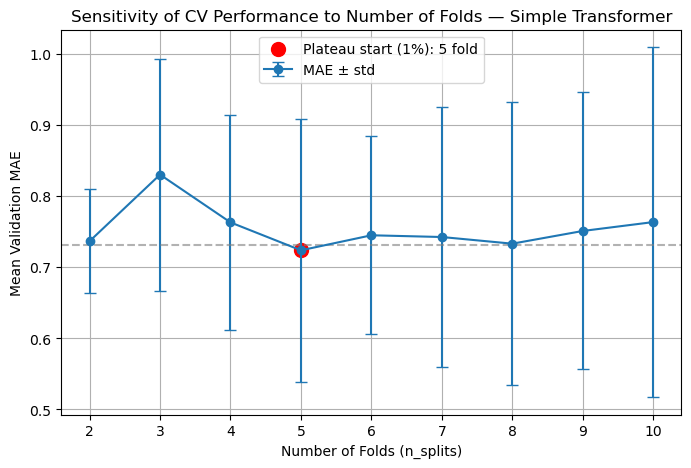

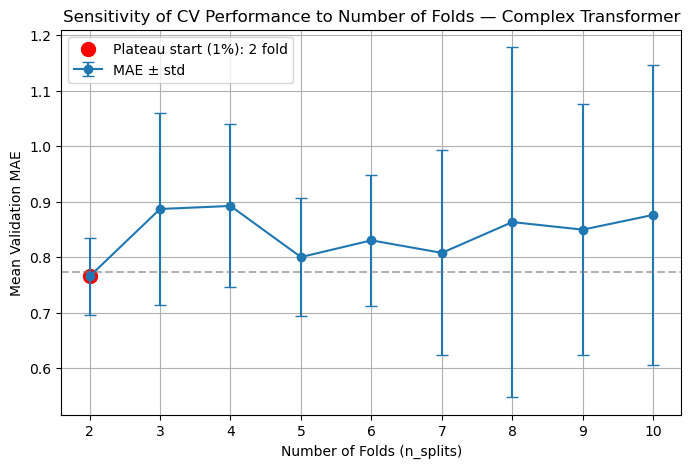

In [14]:
import matplotlib.pyplot as plt

# Define the tolerance when the model plateaus
tol = 0.01 # 1% tolerance

# Minimum consecutive folds with equal or less mean MAE variance than 1%
min_consecutive = 2

for name, data in cv_results.items():

    means = np.array(data['mean'])
    stds = np.array(data['std'])
    fold_values = np.array(fold_values)

    # Define the Plateau point based on the minimum consecutive folds with a MAE change of at max 1%
    min_mae = np.min(means)
    threshold = min_mae * (1 + tol)

    plateau_idx = None
    consecutive_count = 0

    for i in range(len(means)):
        if means[i] <= threshold:
            consecutive_count += 1
            if consecutive_count >= min_consecutive:
                plateau_idx = i - min_consecutive + 1  # Start of the plateau
                break
        else:
            consecutive_count = 0 # It resets if the condition fails

    # In case the previous conditions are not met, it retrieves the default answer
    if plateau_idx is None:
        if len(np.where(means <= threshold)[0]) > 0:
            plateau_idx = np.where(means <= threshold)[0][0] # First index meeting the tolerance
        else:
            0

    plt.figure(figsize=(8, 5))
    plt.errorbar(fold_values, means, yerr=stds, fmt='-o', capsize=4, label="MAE ± std")
    plt.scatter(fold_values[plateau_idx], means[plateau_idx], color='red', s=100, label=f"Plateau start (1%): {fold_values[plateau_idx]} fold")
    plt.axhline(y=threshold, color='gray', linestyle='--', alpha=0.6)
    plt.xlabel("Number of Folds (n_splits)")
    plt.ylabel("Mean Validation MAE")
    plt.title(f"Sensitivity of CV Performance to Number of Folds — {name}")
    plt.grid(True)
    plt.legend()
    plt.show()

## Train and predict with Cross-validation ##

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Create a dictionary with the models
models_ = {
    'Simple Transformer': {'model': simpler_transformer, 'n_splits': 5},
    'Complex Transformer': {'model': complex_transformer, 'n_splits': 2}
}

# Create a dictionary to store the CV predictions of each model
predictions_cv = {}

# Final results - Empty dictionary to store the unbiased results
all_metrics = {}
all_metrics_cv = {}

# Empty dictionary to store predictions
predictions = {}

# tunable parameters
n_timesteps = 30
batch_size = 64 # Before was 32

datasets, n_features, y_test_index = prep_ds_rnns(X, y, seq_len = n_timesteps, n_splits = 5, batch_size = batch_size)

for train_dataset, val_dataset, test_dataset, scaler_rat in datasets:
    for name, model_i in models_.items():
        model_ = model_i['model']
        model = model_(n_timesteps, n_features)
        model.fit(train_dataset,
                validation_data=val_dataset,
                epochs=50,
                batch_size=batch_size,
                shuffle=False, # Chronological order matters, so no shuffle
                callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                           ReduceLROnPlateau(factor=0.5, patience=3)],
                verbose=0)
        
        # Predict in the validation set to compare with the unbiased results
        y_preds_cv, y_val_cv = [], []
        for x_batch_cv, y_batch_cv in val_dataset:
            y_pred_cv = model.predict(x_batch_cv, verbose=0)
            y_preds_cv.extend(y_pred_cv)
            y_val_cv.extend(y_batch_cv.numpy())

        # Convert pred and true values in a numpy array for the metrics computation
        y_preds_cv = np.array(y_preds_cv).flatten()
        y_trues_cv = np.array(y_val_cv).flatten()

        # Inverse the normalization
        y_cv_inv = scaler_rat.inverse_transform(y_preds_cv.reshape(-1, 1)).flatten()
        y_trues_cv = scaler_rat.inverse_transform(y_trues_cv.reshape(-1, 1)).flatten()

        # Save the CV predictions for visualization later on
        predictions_cv[name] = y_cv_inv

        metrics_cv = {
            'MAE': mean_absolute_error(y_trues_cv, y_cv_inv),
            'MSE': mean_squared_error(y_trues_cv, y_cv_inv),
            'R^2 Score': r2_score(y_trues_cv, y_cv_inv),
            'Forecast bias': np.mean(y_cv_inv - y_trues_cv),
            'MAPE': mean_absolute_percentage_error(y_trues_cv, y_cv_inv)
        }

        # Store the metrics for all the models
        all_metrics_cv[name] = metrics_cv

        # ----------------------- Predict on unbiased data -------------------------------

        # Collect predictions and make sure that predictions and true values have the same shape
        y_preds, y_trues = [], []
        for x_batch, y_batch in test_dataset:
            y_pred = model.predict(x_batch, verbose=0)
            y_preds.extend(y_pred)
            y_trues.extend(y_batch.numpy())

        # Convert pred and true values in a numpy array for the metrics computation
        y_preds = np.array(y_preds).flatten()
        y_trues = np.array(y_trues).flatten()

        # Inverse the target normalization
        y_pred_inv = scaler_rat.inverse_transform(y_preds.reshape(-1, 1)).flatten()
        y_trues = scaler_rat.inverse_transform(y_trues.reshape(-1, 1)).flatten()

        # Save the predictions for visualization later
        predictions[name] = y_pred_inv

        # Inverse transform the normalization in the target predictions
        y_preds_inv = scaler_rat.inverse_transform(y_preds.reshape(-1, 1)).flatten()

        # Compute metrics to visualize later
        metrics = {
            'MAE': mean_absolute_error(y_trues, y_preds_inv),
            'MSE': mean_squared_error(y_trues, y_preds_inv),
            'R^2 Score': r2_score(y_trues, y_preds_inv),
            'Forecast bias': np.mean(y_preds_inv - y_trues),
            'MAPE': mean_absolute_percentage_error(y_trues, y_preds_inv)
        }

        # Store all unbiased metrics
        all_metrics[name] = metrics

C:\Users\mapim\AppData\Local\Temp\ipykernel_58448\573200214.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_58448\573200214.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_58448\573200214.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Tunable parameters
n_timesteps = 30
batch_size = 64

# Prepare datasets: returns [folds] and final test
datasets, n_features, y_test_index = prep_ds_rnns(X, y, seq_len=n_timesteps, n_splits=5, batch_size=batch_size)

# Models
models_ = {
    'Simple Transformer': {'model': simpler_transformer, 'n_splits': 5},
    'Complex Transformer': {'model': complex_transformer, 'n_splits': 5}
}

# Dictionaries to store the results
all_metrics_cv = {}  # Store averaged CV results
predictions_cv = {}


# ---------------- Cross-Validation Loop -----------------
for name, model_i in models_.items():
    print(f"\nTraining model: {name}")
    cv_fold_metrics = []

    # Iterate over folds for CV
    for fold, (train_dataset, val_dataset, test_dataset, scaler_rat) in enumerate(datasets):
        print(f"  Fold {fold+1}/{len(datasets)}")

        model = model_i['model'](n_timesteps, n_features)

        model.fit(
            train_dataset,
            validation_data=val_dataset,
            epochs=50,
            batch_size=batch_size,
            shuffle=False,  # chronological order
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                ReduceLROnPlateau(factor=0.5, patience=3)
            ],
            verbose=0
        )

        # ---------- Predict on validation set ----------
        y_preds_cv, y_val_cv = [], []
        for x_batch_cv, y_batch_cv in val_dataset:
            y_pred_cv = model.predict(x_batch_cv, verbose=0)
            y_preds_cv.extend(y_pred_cv)
            y_val_cv.extend(y_batch_cv.numpy())

        y_preds_cv = np.array(y_preds_cv).flatten()
        y_trues_cv = np.array(y_val_cv).flatten()

        # Inverse transform
        y_preds_cv_inv = scaler_rat.inverse_transform(y_preds_cv.reshape(-1, 1)).flatten()
        y_trues_cv_inv = scaler_rat.inverse_transform(y_trues_cv.reshape(-1, 1)).flatten()

        # Metrics for this fold
        fold_metrics = {
            'MAE': mean_absolute_error(y_trues_cv_inv, y_preds_cv_inv),
            'MSE': mean_squared_error(y_trues_cv_inv, y_preds_cv_inv),
            'R^2 Score': r2_score(y_trues_cv_inv, y_preds_cv_inv),
            'Forecast bias': np.mean(y_preds_cv_inv - y_trues_cv_inv),
            'MAPE': mean_absolute_percentage_error(y_trues_cv_inv, y_preds_cv_inv)
        }
        cv_fold_metrics.append(fold_metrics)

        # Save last fold CV predictions
        if fold == len(datasets)-1:
            predictions_cv[name] = y_preds_cv_inv

    # ---------- Average CV Metrics ----------
    final_cv_metrics = {
        k: np.mean([fold[k] for fold in cv_fold_metrics])
        for k in cv_fold_metrics[0]
    }
    all_metrics_cv[name] = final_cv_metrics


C:\Users\mapim\AppData\Local\Temp\ipykernel_174812\730932534.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_174812\730932534.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_174812\730932534.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =


Training model: Simple Transformer
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5

Training model: Complex Transformer
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5


In [14]:
# Create a dataframe to compare the metrics of the models
metrics_df_cv = pd.DataFrame.from_dict(all_metrics_cv, orient='index')

# Reset index to show models as a column
metrics_df_cv = metrics_df_cv.reset_index().rename(columns={'index': 'Model'})

metrics_df_cv

,Model,MAE,MSE,R^2 Score,Forecast bias,MAPE
0,Simple Transformer,0.623434,1.117491,0.864957,0.118896,0.415041
1,Complex Transformer,0.551471,0.850482,0.894112,0.102169,0.346452


## Evaluate the models ##

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.utils import timeseries_dataset_from_array
from numpy import array

# Indexes of numerical features and high cardinality categorical variables
prog_idx_st = X.columns.get_loc('VARIOS') #The program starts after the "Varios"
prog_idx_end = X.columns.get_loc('VAI OU RACHA')
prog_idx_pca = list(range(prog_idx_st + 1, prog_idx_end+1))

def prep_test_eval (X, y, n_timesteps, batch_size):
    
    X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    y_test_index = y_test.index

    scaler_dur = MinMaxScaler(feature_range=(-1, 1))
    X_train_cv['Duração'] = scaler_dur.fit_transform(X_train_cv['Duração'].values.reshape(-1, 1))
    X_test['Duração'] = scaler_dur.transform(X_test['Duração'].values.reshape(-1, 1))

    scaler_rat = MinMaxScaler(feature_range=(-1, 1))
    y_train_scaled = scaler_rat.fit_transform(array(y_train_cv).reshape(-1, 1))
    y_test_scaled = scaler_rat.transform(array(y_test).reshape(-1, 1))

    pca = PCA(n_components=28, random_state=42)
    X_tr_pca = pca.fit_transform(X_train_cv.iloc[:, prog_idx_st+1:prog_idx_end])
    X_test_pca = pca.transform(X_test.iloc[:, prog_idx_st+1:prog_idx_end])

    # ------------------- Feature Selection ----------------------

    cols_before = X.columns[:prog_idx_st+1]
    cols_after = X.columns[prog_idx_end+1:]
    orig_cols = list(cols_before) + list(cols_after)
    pca_cols = [f"PCA_{i+1}" for i in range(X_tr_pca.shape[1])]
    all_cols = orig_cols + pca_cols

    X_tr_final = pd.DataFrame(
        np.hstack([X_train_cv[orig_cols].values, X_tr_pca]),
        index=X_train_cv.index,
        columns=all_cols
    )

    X_test_final = pd.DataFrame(
        np.hstack([X_test[orig_cols].values, X_test_pca]),
        index=X_test.index,
        columns=all_cols
    )

    '''# Now concat for correlation
    X_rebuilt = pd.concat([X_tr_final, X_test_final])
    y_rebuilt = pd.Series(
        np.concatenate([y_train_scaled.ravel(), y_test_scaled.ravel()]),
        name="Universo rat%"
    )

    X_corr = pd.concat([X_rebuilt, y_rebuilt], axis=1).corr()

    # Feature ranking
    X_n_feat = abs(X_corr['Universo rat%']).sort_values(ascending=False).iloc[1:11]  # skip target itself

    # Define the time dependent columns
    necessary_cols = ['Hora Início_sin', 'Hora Início_cos', 'Hora Fim_sin', 'Hora Fim_cos']

    # Ensure necessary cols are included
    missing = set(necessary_cols) - set(X_n_feat.index)
    X_10 = X_n_feat.index.append(pd.Index(missing))

    # Select features
    X_tr_final, X_test_final = X_tr_final[X_10], X_test_final[X_10]'''

    # Get the number of features
    n_features = X_tr_final.shape[1]

    # --- Create RNN datasets ---
    train_dataset = timeseries_dataset_from_array(
        data=X_tr_final, targets=y_train_scaled,
        sequence_length=n_timesteps, batch_size=batch_size, shuffle=False
    )

    test_dataset = timeseries_dataset_from_array(
        data=X_test_final, targets=y_test_scaled,
        sequence_length=n_timesteps, batch_size=batch_size, shuffle=False
    )
    
    datasets = []

    datasets.append((train_dataset, test_dataset, scaler_rat))

    return datasets, n_features, y_test_index

In [19]:
def extract_attention_scores(model, X_test_full, model_name):
    """
    Extract attention scores for all relevant attention layers in a Transformer model.
    """
    attention_maps = {}

    if model_name == "Simple Transformer":
        # Single attention layer
        attn_layer = model.get_layer("multi_head_attention_simpT")
        extractor = tf.keras.Model(inputs=model.inputs, outputs=attn_layer.output[1])
        scores = extractor.predict(X_test_full, verbose=0)
        attention_maps["multi_head_attention_simpT"] = scores
        print(f"[Simple Transformer] Attention shape: {scores.shape}")

    else:
        # Complex Transformer - loop through all blocks
        i = 0
        while True:
            try:
                layer_name = f"multi_head_attention_complex_block{i}"
                attn_layer = model.get_layer(layer_name)
                extractor = tf.keras.Model(inputs=model.inputs, outputs=attn_layer.output[1])
                scores = extractor.predict(X_test_full, verbose=0)
                attention_maps[layer_name] = scores
                print(f"[Complex Transformer] Block {i} attention shape: {scores.shape}")
                i += 1
            except ValueError:
                # No more attention blocks
                break

    return attention_maps

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

n_timesteps = 30
batch_size = 64

# Prepare final train + validation data
final_datasets, n_features, y_test_index = prep_test_eval(X, y, n_timesteps, batch_size)
train_dataset, test_dataset, scaler_rat = final_datasets[0]
print(n_features)

# Models
models_ = {
    'Simple Transformer': {'model': simpler_transformer},
    'Complex Transformer': {'model': complex_transformer}
}

# Dictionaries to store the results
all_metrics= {}  # Store final unbiased test results
predictions_test = {}
weights = {}

for name, model_i in models_.items():
    print(f"\nFinal test evaluation for model: {name}")

    model = model_i['model'](n_timesteps, n_features)

    # Train on ALL train + validation
    model.fit(
        train_dataset,
        epochs=50,
        batch_size=batch_size,
        shuffle=False,
        callbacks=[
            EarlyStopping(monitor='loss', patience=5, restore_best_weights=True),
            ReduceLROnPlateau(factor=0.5, patience=3)
        ],
        verbose=0
    )

    X_test_batches = []

    # ---------- Predict on Test Set ----------
    y_preds_test, y_trues_test = [], []
    for x_batch, y_batch in test_dataset:
        y_pred = model.predict(x_batch, verbose=0)
        y_preds_test.extend(y_pred)
        y_trues_test.extend(y_batch.numpy())
        X_test_batches.append(x_batch.numpy())

    # Combine all the test sequences (for attention scores)
    X_test_full = np.vstack(X_test_batches)

    y_preds_test = np.array(y_preds_test).flatten()
    y_trues_test = np.array(y_trues_test).flatten()

    # Inverse transform
    y_preds_test_inv = scaler_rat.inverse_transform(y_preds_test.reshape(-1, 1)).flatten()
    y_trues_test_inv = scaler_rat.inverse_transform(y_trues_test.reshape(-1, 1)).flatten()

    predictions_test[name] = y_preds_test_inv

    # Extract all attention maps
    #attention_scores_dict = extract_attention_scores(model, X_test_full, name)

    # Save them in your dictionary for later analysis
    #weights[name] = attention_scores_dict

    # Compute FINAL unbiased metrics
    final_test_metrics = {
        'MAE': mean_absolute_error(y_trues_test_inv, y_preds_test_inv),
        'MSE': mean_squared_error(y_trues_test_inv, y_preds_test_inv),
        'R^2 Score': r2_score(y_trues_test_inv, y_preds_test_inv),
        'Forecast bias': np.mean(y_preds_test_inv - y_trues_test_inv),
        'MAPE': mean_absolute_percentage_error(y_trues_test_inv, y_preds_test_inv)
    }
    all_metrics[name] = final_test_metrics

109

Final test evaluation for model: Simple Transformer


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,mse,learning_rate.
  callback.on_epoch_end(epoch, logs)



Final test evaluation for model: Complex Transformer


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,mse,learning_rate.
  callback.on_epoch_end(epoch, logs)


In [16]:
# Create a dataframe to compare the metrics of the models
metrics_df_unbiased = pd.DataFrame.from_dict(all_metrics, orient='index')

# Reset index to show models as a column
metrics_df_unbiased = metrics_df_unbiased.reset_index().rename(columns={'index': 'Model'})

metrics_df_unbiased

,Model,MAE,MSE,R^2 Score,Forecast bias,MAPE
0,Simple Transformer,0.350814,0.253093,0.965772,-0.003475,0.246233
1,Complex Transformer,0.349011,0.286042,0.961317,-0.008512,0.241929


## Results visualization ##

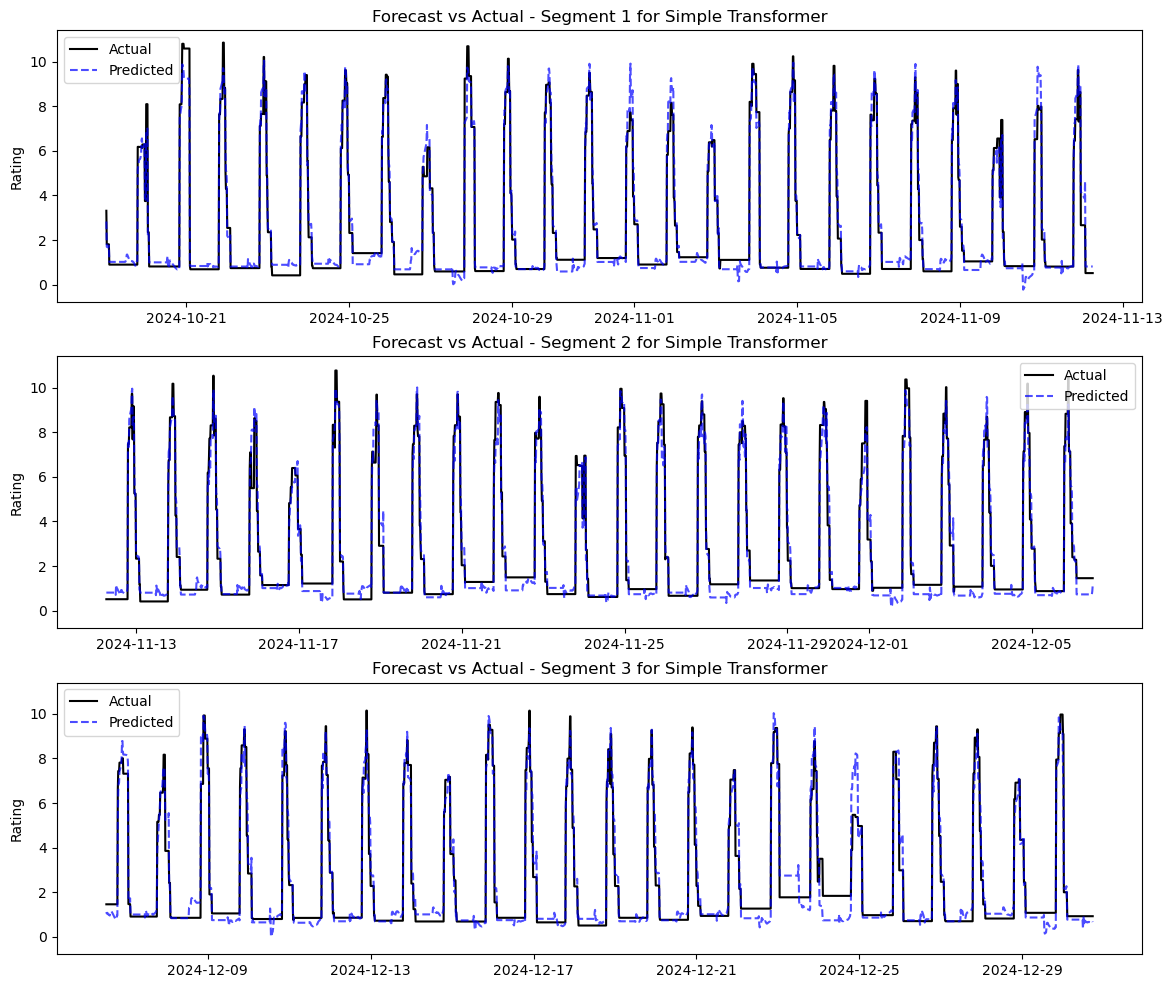

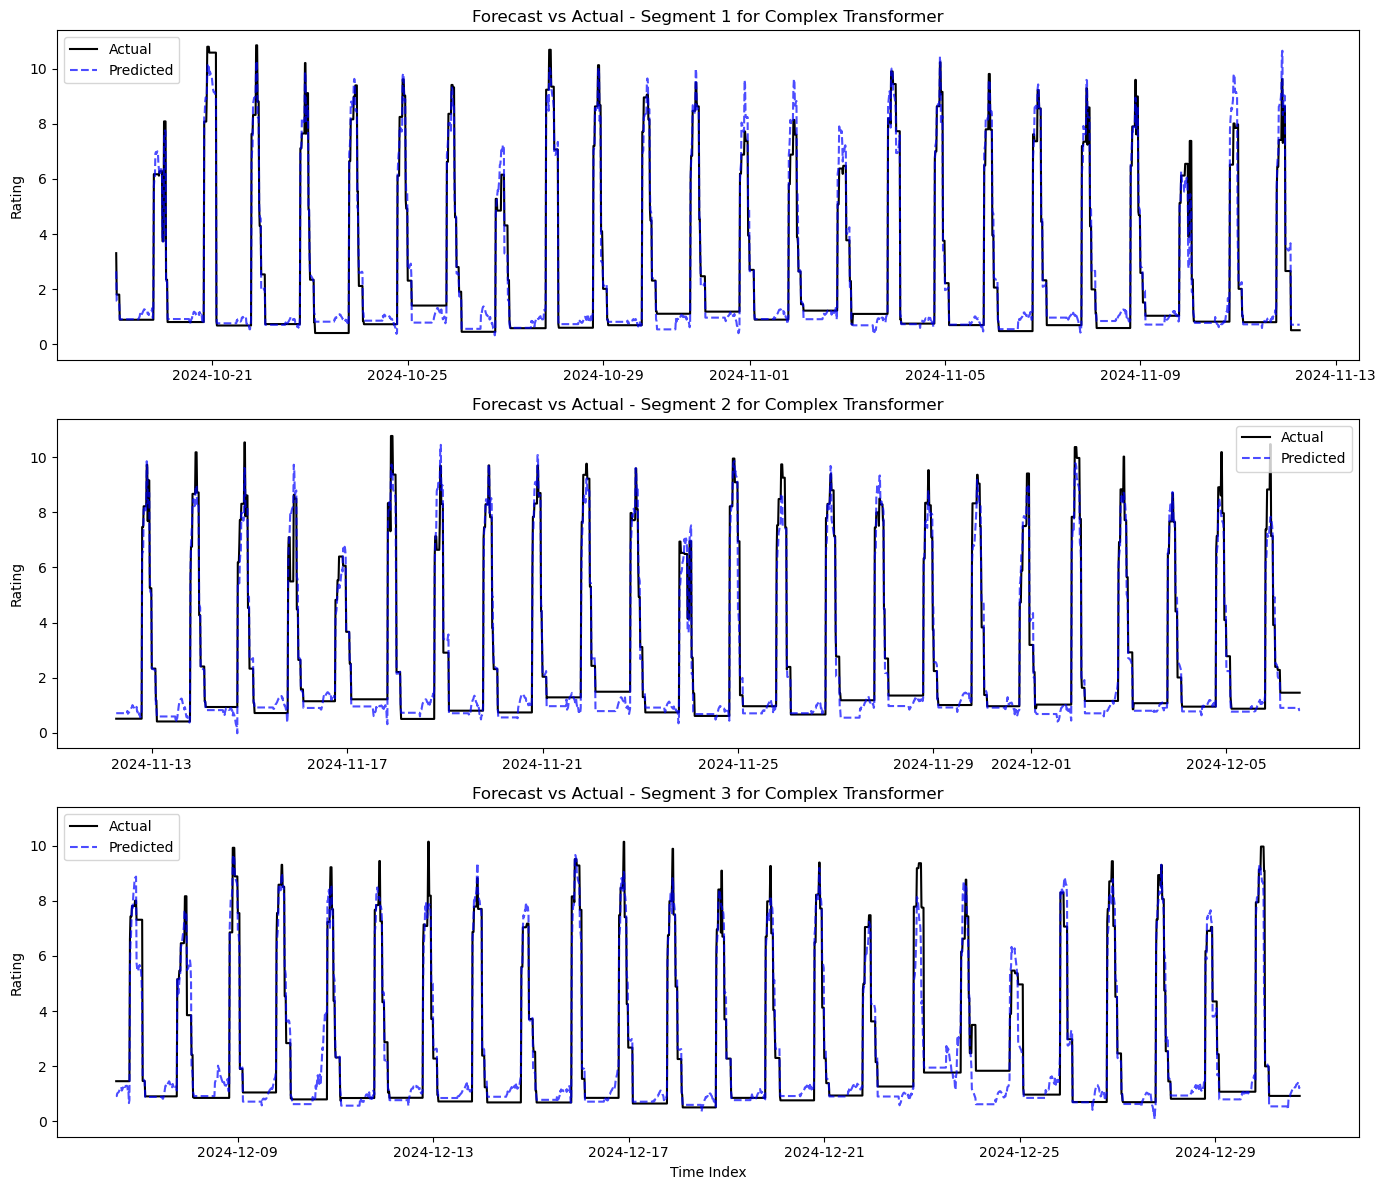

In [17]:
import matplotlib.pyplot as plt
import numpy as np

for name in models_.keys():
    y_true = y_trues_test_inv
    y_pred = predictions_test[name]
    # Get time index (replace with your real datetime index if available)
    time_index = np.arange(len(y_true))

    # Split into 3 roughly equal parts
    n = len(y_true)
    splits = np.array_split(np.arange(n), 3)

    fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharey=True)
    for i, idx in enumerate(splits):
        axs[i].plot(y_test_index[idx], y_true[idx], label="Actual", color="black")
        axs[i].plot(y_test_index[idx], y_pred[idx], label="Predicted", color="blue", alpha=0.7, linestyle = "dashed")
        #axs[i].plot(y_test_index[idx], y_pred[idx], label="CV predictions", color="red", alpha=0.7, linestyle = "dashed")
        axs[i].set_title(f"Forecast vs Actual - Segment {i+1} for {name}")
        axs[i].set_ylabel("Rating")
        axs[i].legend()

axs[-1].set_xlabel("Time Index")
plt.tight_layout()
plt.show()


## Hyperparameters fine tuning using Keras Tuner ##

In [ ]:
import keras_tuner as kt
import tensorflow as tf
from keras.losses import Huber

n_timesteps = 30
n_splits = 5
batch_size = 64

datasets, n_features, y_test_index = prep_ds_rnns(X, y, seq_len = n_timesteps, n_splits = n_splits, batch_size = batch_size)

train_dataset, val_dataset, test_dataset, scaler_rat = datasets[0]

# ----------- Build function for simpler transformer -----------
def build_simpler_transformer_tuner(hp):
    input_shape = (n_timesteps, n_features)

    inputs = tf.keras.Input(shape=input_shape)

    # 1. Initial Conv1D
    x = tf.keras.layers.Conv1D(
        filters=hp.Choice('conv_filters', values=[64, 96, 128]),
        kernel_size=3,
        padding='same',
        activation='relu'
    )(inputs)
    x = tf.keras.layers.LayerNormalization()(x)

    # 2. Multi-head Attention
    x = tf.keras.layers.MultiHeadAttention(
        num_heads=hp.Choice('num_heads', values=[4, 6, 8]),
        key_dim=32
    )(x, x)
    x = tf.keras.layers.Dropout(
        hp.Float('dropout', min_value=0.1, max_value=0.3, step=0.05)
    )(x)

    # 3. Temporal Conv1D
    x = tf.keras.layers.Conv1D(
        filters=hp.Choice('temporal_filters', values=[32, 64]),
        kernel_size=3,
        padding='same',
        activation='relu'
    )(x)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)

    # 4. Dense before output
    x = tf.keras.layers.Dense(
        units=hp.Choice('dense_units', values=[32, 64, 128]),
        activation='relu'
    )(x)

    outputs = tf.keras.layers.Dense(1, activation='linear')(x)

    model = tf.keras.models.Model(inputs, outputs)

    # Compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 2e-4])
        ),
        loss=Huber(),
        metrics=['mae', 'mse']
    )

    return model

# ----------- Setup the tuner -----------
tuner_simpler = kt.RandomSearch(
    build_simpler_transformer_tuner,
    objective='val_mae',
    max_trials=15,
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='simpler_transformer_tuning'
)

# ----------- Run the search -----------
tuner_simpler.search(
    train_dataset,
    epochs=10,
    validation_data=val_dataset
)

# ----------- Results -----------
tuner_simpler.results_summary()

# Best hyperparameters
best_hp_simpler = tuner_simpler.get_best_hyperparameters(1)[0]
print("Best hyperparameters:", best_hp_simpler.values)

# Save best model
best_simpler_model = tuner_simpler.get_best_models(num_models=1)[0]
best_simpler_model.save('best_simpler_transformer.keras')


Trial 15 Complete [00h 00m 53s]
val_mae: 0.14448301494121552

Best val_mae So Far: 0.13381965458393097
Total elapsed time: 00h 10m 14s
Results summary
Results in keras_tuner\simpler_transformer_tuning
Showing 10 best trials
Objective(name="val_mae", direction="min")

Trial 04 summary
Hyperparameters:
conv_filters: 96
num_heads: 8
dropout: 0.15000000000000002
temporal_filters: 64
dense_units: 32
learning_rate: 0.0005
Score: 0.13381965458393097

Trial 02 summary
Hyperparameters:
conv_filters: 96
num_heads: 4
dropout: 0.2
temporal_filters: 32
dense_units: 32
learning_rate: 0.001
Score: 0.14160969853401184

Trial 09 summary
Hyperparameters:
conv_filters: 64
num_heads: 4
dropout: 0.25
temporal_filters: 32
dense_units: 128
learning_rate: 0.001
Score: 0.14405211806297302

Trial 14 summary
Hyperparameters:
conv_filters: 96
num_heads: 8
dropout: 0.2
temporal_filters: 32
dense_units: 64
learning_rate: 0.001
Score: 0.14448301494121552

Trial 13 summary
Hyperparameters:
conv_filters: 64
num_heads:

c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [15]:
import keras_tuner as kt
import tensorflow as tf
from keras.losses import Huber

n_timesteps = 30
n_splits = 5
batch_size = 64

datasets, n_features, y_test_index = prep_ds_rnns(X, y, seq_len = n_timesteps, n_splits = n_splits, batch_size = batch_size)

train_dataset, val_dataset, test_dataset, scaler_rat = datasets[0]

# ----------- Build function for Keras Tuner -----------
def build_complex_transformer_tuner(hp):
    input_shape = (n_timesteps, n_features)

    # Transformer hyperparameters
    head_size = hp.Choice('head_size', values=[16, 32, 64])
    num_heads = hp.Choice('num_heads', values=[2, 4, 8])
    ff_dim = hp.Choice('ff_dim', values=[64, 128, 256])
    num_transformer_blocks = hp.Int('num_blocks', min_value=2, max_value=6, step=1)
    dropout = hp.Float('dropout', min_value=0.1, max_value=0.3, step=0.05)
    mlp_units = [hp.Choice('mlp_units', values=[32, 64, 128])]
    mlp_dropout = hp.Float('mlp_dropout', min_value=0.1, max_value=0.3, step=0.05)

    # Build model
    model = build_complex_transformer(
        input_shape=input_shape,
        head_size=head_size,
        num_heads=num_heads,
        ff_dim=ff_dim,
        num_transformer_blocks=num_transformer_blocks,
        mlp_units=mlp_units,
        dropout=dropout,
        mlp_dropout=mlp_dropout
    )

    # Compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 2e-4])
        ),
        loss=Huber(),
        metrics=['mae', 'mse']
    )

    return model

# ----------- Setup the Tuner -----------
tuner_complex = kt.RandomSearch(
    build_complex_transformer_tuner,
    objective='val_mae',
    max_trials=15,
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='complex_transformer_tuning'
)

# ----------- Run the search -----------
tuner_complex.search(
    train_dataset,
    epochs=10,
    validation_data=val_dataset
)

# ----------- Results -----------
tuner_complex.results_summary()

# Best hyperparameters
best_hp_complex = tuner_complex.get_best_hyperparameters(1)[0]
print("Best hyperparameters:", best_hp_complex.values)

# Save best model
best_complex_model = tuner_complex.get_best_models(num_models=1)[0]
best_complex_model.save('best_complex_transformer.keras')


Trial 15 Complete [00h 03m 37s]
val_mae: 0.19364233314990997

Best val_mae So Far: 0.1640205830335617
Total elapsed time: 00h 21m 43s
Results summary
Results in keras_tuner\complex_transformer_tuning
Showing 10 best trials
Objective(name="val_mae", direction="min")

Trial 11 summary
Hyperparameters:
head_size: 64
num_heads: 2
ff_dim: 256
num_blocks: 6
dropout: 0.2
mlp_units: 128
mlp_dropout: 0.2
learning_rate: 0.0005
Score: 0.1640205830335617

Trial 01 summary
Hyperparameters:
head_size: 32
num_heads: 2
ff_dim: 128
num_blocks: 6
dropout: 0.1
mlp_units: 64
mlp_dropout: 0.25
learning_rate: 0.0005
Score: 0.17882303893566132

Trial 02 summary
Hyperparameters:
head_size: 16
num_heads: 4
ff_dim: 64
num_blocks: 5
dropout: 0.15000000000000002
mlp_units: 128
mlp_dropout: 0.2
learning_rate: 0.001
Score: 0.17914271354675293

Trial 03 summary
Hyperparameters:
head_size: 16
num_heads: 4
ff_dim: 256
num_blocks: 3
dropout: 0.2
mlp_units: 64
mlp_dropout: 0.25
learning_rate: 0.0005
Score: 0.18190720677

c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 202 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
